# AdaBoost Algorithm - From Scratch

## Project Overview
This notebook implements the AdaBoost (Adaptive Boosting) algorithm from scratch to understand how it works internally.

**What is AdaBoost?**
- AdaBoost is an ensemble learning method
- It combines multiple weak learners (simple models) to create a strong classifier
- Each weak learner focuses on examples that previous learners got wrong
- It's called "adaptive" because it adapts to the errors of weak learners

**What we'll build:**
1. A simple dataset for binary classification
2. A decision stump (weak learner)
3. The AdaBoost algorithm
4. Visualization and evaluation tools

---

## Step 1: Import Libraries and Create Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


### Creating a Simple Dataset

**Why we need data:**
- We need training data to teach our AdaBoost algorithm
- We'll create a 2D dataset (2 features: x1 and x2)
- Binary classification: Class 1 and Class -1

**How we create it:**
- Class 1: 50 points clustered around (2, 2)
- Class -1: 50 points clustered around (-2, -2)
- Total: 100 samples

**Why use -1 and 1 instead of 0 and 1?**
- AdaBoost math works better with -1 and +1
- Makes calculations cleaner (you'll see why later!)

In [2]:
def create_dataset():
    """
    Creates a simple 2D dataset for binary classification
    
    Returns:
        X: Features (numpy array of shape (n_samples, 2))
        y: Labels (numpy array of shape (n_samples,)) with values -1 or 1
    """
    n_samples = 100
    
    # Create first class (label = 1): points clustered around (2, 2)
    # np.random.randn generates random numbers from standard normal distribution
    # Adding [2, 2] shifts the center of the cluster
    X_class1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
    y_class1 = np.ones(n_samples // 2)  # All labels = 1
    
    # Create second class (label = -1): points clustered around (-2, -2)
    X_class2 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
    y_class2 = -np.ones(n_samples // 2)  # All labels = -1
    
    # Combine both classes
    # vstack = vertical stack (stack rows on top of each other)
    X = np.vstack([X_class1, X_class2])
    # hstack = horizontal stack (concatenate arrays)
    y = np.hstack([y_class1, y_class2])
    
    # Shuffle the data so classes are mixed
    # This is important for training!
    shuffle_indices = np.random.permutation(n_samples)
    X = X[shuffle_indices]
    y = y[shuffle_indices]
    
    return X, y

# Create the dataset
X, y = create_dataset()

print("Dataset created successfully!")
print(f"Shape of features (X): {X.shape}")  # (100, 2) = 100 samples, 2 features
print(f"Shape of labels (y): {y.shape}")    # (100,) = 100 labels
print(f"\nNumber of positive class (+1): {np.sum(y == 1)}")
print(f"Number of negative class (-1): {np.sum(y == -1)}")

Dataset created successfully!
Shape of features (X): (100, 2)
Shape of labels (y): (100,)

Number of positive class (+1): 50
Number of negative class (-1): 50


### Let's Look at Our Data
Now let's examine the first few samples to understand what we're working with.

In [3]:
# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature 1 (x1)', 'Feature 2 (x2)'])
df['Label (y)'] = y

print("First 10 samples of our dataset:")
print(df.head(10))

print("\n"+"-"*50)
print(f"\nDataset Statistics:\n{df.describe()}")

First 10 samples of our dataset:
   Feature 1 (x1)  Feature 2 (x2)  Label (y)
0       -1.526762       -2.072829       -1.0
1        1.160782        1.690788        1.0
2       -3.918771       -2.026514       -1.0
3        1.520826        1.814341        1.0
4       -2.974682       -1.212915       -1.0
5        2.822545        0.779156        1.0
6       -1.742450       -2.074446       -1.0
7       -2.680025       -1.767746       -1.0
8        3.465649        1.774224        1.0
9        1.091976        0.587696        1.0

--------------------------------------------------

Dataset Statistics:
       Feature 1 (x1)  Feature 2 (x2)   Label (y)
count      100.000000      100.000000  100.000000
mean        -0.115564        0.034022    0.000000
std          2.166199        2.147016    1.005038
min         -3.918771       -3.514847   -1.000000
25%         -1.998927       -1.779651   -1.000000
50%         -0.124020        0.138588    0.000000
75%          1.937036        1.784253    1.000000

### Visualize the Dataset

**Why visualize?**
- Helps us understand if the data is separable
- We can see the two classes clearly
- Makes it easier to understand how AdaBoost will work

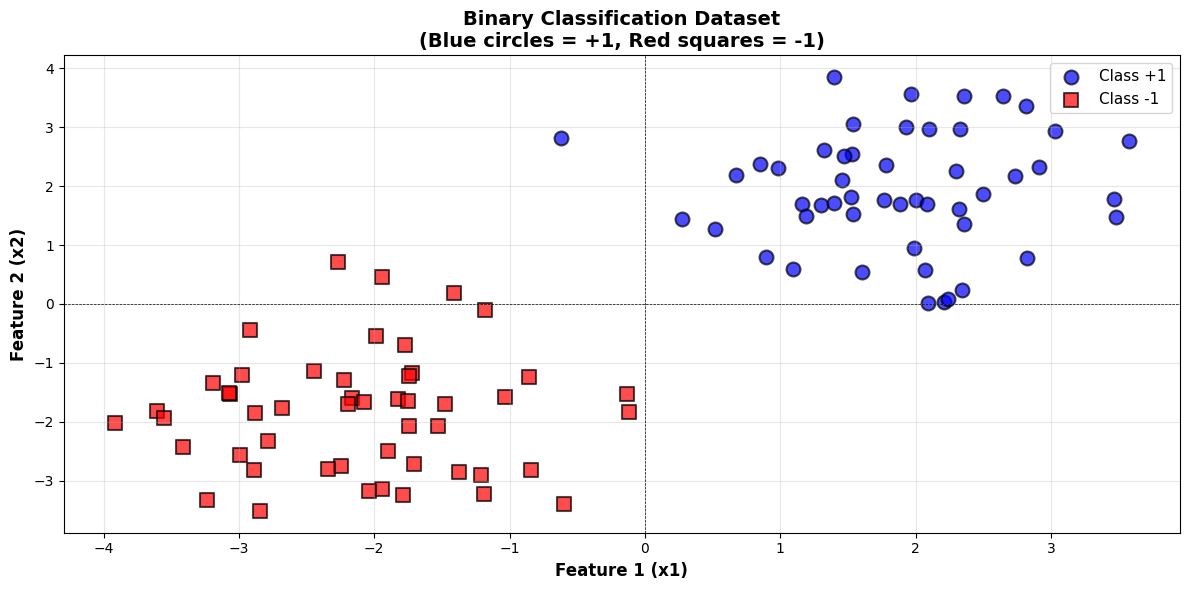

Visualization complete!

Observations:
- Blue circles (Class +1) are mostly in the upper-right region
- Red squares (Class -1) are mostly in the lower-left region
- The classes are separable, but not perfectly (some overlap)


In [4]:
# Create visualization
plt.figure(figsize=(12, 6))

# Plot positive class (y = 1) in blue
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
           c='blue', marker='o', s=100, alpha=0.7, 
           edgecolors='black', linewidth=1.5,
           label='Class +1')

# Plot negative class (y = -1) in red
plt.scatter(X[y == -1, 0], X[y == -1, 1], 
           c='red', marker='s', s=100, alpha=0.7,
           edgecolors='black', linewidth=1.5,
           label='Class -1')

plt.xlabel('Feature 1 (x1)', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2 (x2)', fontsize=12, fontweight='bold')
plt.title('Binary Classification Dataset\n(Blue circles = +1, Red squares = -1)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

print("Visualization complete!")
print("\nObservations:")
print("- Blue circles (Class +1) are mostly in the upper-right region")
print("- Red squares (Class -1) are mostly in the lower-left region")
print("- The classes are separable, but not perfectly (some overlap)")

---
## Step 1 Complete!

**What we've accomplished:**
- ✓ Set up our environment with necessary libraries
- ✓ Created a dataset with 100 samples and 2 features
- ✓ Labeled data with two classes (+1 and -1)
- ✓ Visualized the data to understand its structure

**Key Takeaways:**
1. We have 50 samples of each class
2. The data is linearly separable (mostly)
3. Features are on different scales (roughly -4 to 4)
4. This is perfect for demonstrating AdaBoost!

**Next Step:** We'll create our weak learner (Decision Stump)

---

---
## Step 2: Building the Decision Stump (Weak Learner)

### What is a Decision Stump?
- A **decision stump** is the simplest possible decision tree
- It has only ONE split (one decision rule)
- Example: "If Feature 1 > 0.5, predict +1, else predict -1"

### Why use Decision Stumps in AdaBoost?
- They are "weak learners" (only slightly better than random guessing)
- Very fast to train
- AdaBoost's strength comes from combining many weak learners
- Each stump focuses on different parts of the data

### How a Decision Stump Works:
1. Choose one feature (x1 or x2)
2. Choose one threshold value
3. Make prediction based on: feature > threshold?

**Example:**
```
If x1 > 1.5:
    predict +1
else:
    predict -1
```

### What We'll Build:
A class that can:
- Try all possible splits (all features × all thresholds)
- Find the best split that minimizes weighted error
- Make predictions on new data

In [5]:
class DecisionStump:
    """
    A decision stump is a one-level decision tree.
    It makes predictions based on a single feature and threshold.
    
    Attributes:
        feature_index: Which feature to use (0 or 1 in our case)
        threshold: The value to compare against
        polarity: Direction of inequality (1 or -1)
                  1 means: if feature > threshold, predict +1
                 -1 means: if feature < threshold, predict +1
    """
    
    def __init__(self):
        # These will be set during training
        self.feature_index = None  # Which feature column to use
        self.threshold = None      # The split value
        self.polarity = None       # 1 or -1 (direction of split)
        self.alpha = None          # Weight of this stump (set by AdaBoost)
    
    
    def predict(self, X):
        """
        Make predictions for samples in X
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        
        Returns:
            predictions: numpy array of shape (n_samples,) with values -1 or 1
        """
        n_samples = X.shape[0]
        
        # Get the feature column we're using for this stump
        feature_column = X[:, self.feature_index]
        
        # Initialize all predictions to 1
        predictions = np.ones(n_samples)
        
        # Apply the decision rule based on polarity
        if self.polarity == 1:
            # If feature value < threshold, predict -1
            predictions[feature_column < self.threshold] = -1
        else:
            # If feature value > threshold, predict -1
            predictions[feature_column > self.threshold] = -1
        
        return predictions

print("DecisionStump class created!")
print("\nWhat this class can do:")
print("  - Store a simple decision rule (feature + threshold + direction)")
print("  - Make predictions based on that rule")
print("\nNext: We'll create the training method to find the best rule!")

DecisionStump class created!

What this class can do:
  - Store a simple decision rule (feature + threshold + direction)
  - Make predictions based on that rule

Next: We'll create the training method to find the best rule!


### Training the Decision Stump

**The Challenge:**
How do we find the BEST split? We need to:
1. Try every possible feature (x1 and x2)
2. Try many possible threshold values
3. Try both polarities (< and >)
4. Pick the combination with the **lowest weighted error**

**What is Weighted Error?**
- In AdaBoost, each sample has a weight
- Samples that were misclassified before get higher weights
- Error = sum of weights of misclassified samples
- We want to minimize this!

**Formula:**
```
weighted_error = Σ (weight_i × I(prediction_i ≠ actual_i))
```
Where I() is an indicator function (1 if wrong, 0 if correct)

In [ ]:
def train_decision_stump(X, y, sample_weights):
    """
    Train a decision stump by finding the best feature, threshold, and polarity
    that minimizes the weighted error.
    
    Args:
        X: Feature matrix (n_samples, n_features)
        y: True labels (n_samples,) with values -1 or 1
        sample_weights: Weight for each sample (n_samples,)
        
    Returns:
        best_stump: Trained DecisionStump object
        min_error: The weighted error of this stump
    """
    n_samples, n_features = X.shape
    
    # Initialize variables to track the best stump
    min_error = float('inf')  # Start with infinity
    best_stump = DecisionStump()
    
    # Loop through each feature
    for feature_idx in range(n_features):
        
        # Get all values of this feature
        feature_values = X[:, feature_idx]
        
        # Get unique values as potential thresholds
        # We'll try splitting at each unique value
        unique_values = np.unique(feature_values)
        
        # Try each unique value as a threshold
        for threshold in unique_values:
            
            # Try both polarities (directions)
            for polarity in [1, -1]:
                
                # Create a temporary stump with these parameters
                stump = DecisionStump()
                stump.feature_index = feature_idx
                stump.threshold = threshold
                stump.polarity = polarity
                
                # Make predictions with this stump
                predictions = stump.predict(X)
                
                # Calculate weighted error
                # misclassified = 1 where prediction != actual label
                misclassified = (predictions != y).astype(int)
                
                # Weighted error = sum of weights where we made mistakes
                error = np.sum(sample_weights * misclassified)
                
                # Keep track of the best stump (lowest error)
                if error < min_error:
                    min_error = error
                    best_stump.feature_index = feature_idx
                    best_stump.threshold = threshold
                    best_stump.polarity = polarity
    
    return best_stump, min_error

print("Decision Stump training function created!")
print("\nThis function:")
print("  - Tries all possible splits")
print("  - Calculates weighted error for each split")
print("  - Returns the best decision stump")

✓ Decision Stump training function created!

This function:
  - Tries all possible splits
  - Calculates weighted error for each split
  - Returns the best decision stump


### Let's Test Our Decision Stump!

We'll create a simple test to see if our decision stump works correctly.
For this test, we'll use **equal weights** for all samples (like a regular decision tree).

In [9]:
# Test the decision stump with equal weights
print("TESTING DECISION STUMP")
print("-"*60)

# Initialize equal weights for all samples
n_samples = X.shape[0]
equal_weights = np.ones(n_samples) / n_samples  # Each sample has weight 1/100

print(f"\n1. Training decision stump on {n_samples} samples...")
print(f"   Initial weights: all equal to {equal_weights[0]:.4f}")

# Train the stump
best_stump, error = train_decision_stump(X, y, equal_weights)

print(f"\n2. Training complete!")
print(f"    Best feature: Feature {best_stump.feature_index + 1}")
print(f"    Best threshold: {best_stump.threshold:.4f}")
print(f"    Polarity: {best_stump.polarity}")
print(f"    Weighted error: {error:.4f}")

# Make predictions
predictions = best_stump.predict(X)

# Calculate accuracy
accuracy = np.sum(predictions == y) / n_samples
print(f"\n3. Performance:")
print(f"    Accuracy: {accuracy:.2%}")
print(f"    Correct predictions: {np.sum(predictions == y)}/{n_samples}")

# Interpret the rule
if best_stump.polarity == 1:
    rule = f"If Feature {best_stump.feature_index + 1} >= {best_stump.threshold:.2f}, predict +1, else predict -1"
else:
    rule = f"If Feature {best_stump.feature_index + 1} <= {best_stump.threshold:.2f}, predict +1, else predict -1"

print(f"\n4. Decision Rule:")
print(f"   {rule}")

TESTING DECISION STUMP
------------------------------------------------------------

1. Training decision stump on 100 samples...
   Initial weights: all equal to 0.0100

2. Training complete!
    Best feature: Feature 1
    Best threshold: 0.2751
    Polarity: 1
    Weighted error: 0.0100

3. Performance:
    Accuracy: 99.00%
    Correct predictions: 99/100

4. Decision Rule:
   If Feature 1 >= 0.28, predict +1, else predict -1


### Visualize the Decision Boundary

Let's see how this single decision stump divides the space!

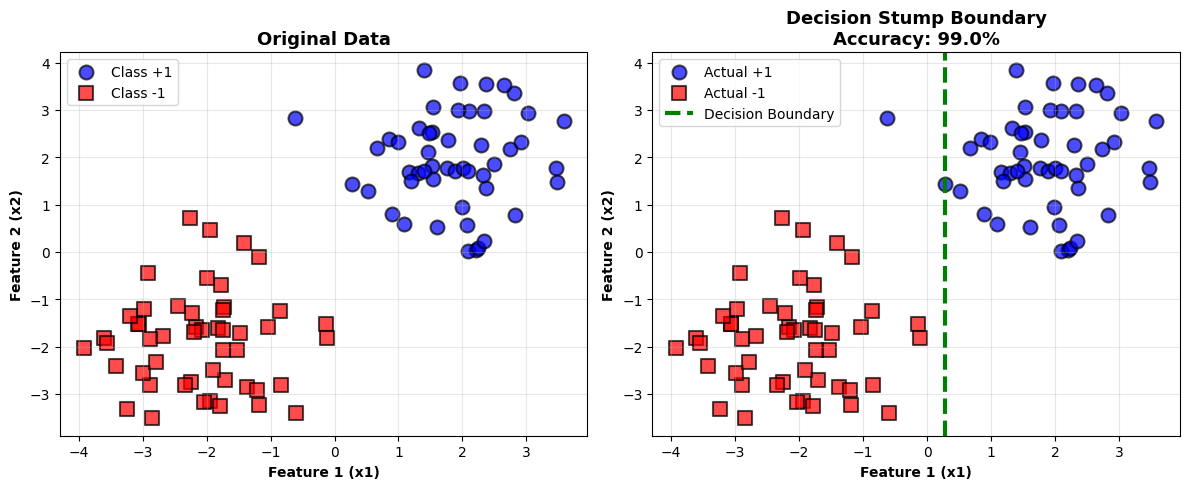

✓ The green dashed line shows where the decision stump splits the data


In [10]:
# Visualize the decision stump's decision boundary
plt.figure(figsize=(12, 5))

# Subplot 1: Original data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', s=100, 
            alpha=0.7, edgecolors='black', linewidth=1.5, label='Class +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', marker='s', s=100, 
            alpha=0.7, edgecolors='black', linewidth=1.5, label='Class -1')
plt.xlabel('Feature 1 (x1)', fontweight='bold')
plt.ylabel('Feature 2 (x2)', fontweight='bold')
plt.title('Original Data', fontweight='bold', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Data with decision boundary
plt.subplot(1, 2, 2)

# Plot the data
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', s=100, 
            alpha=0.7, edgecolors='black', linewidth=1.5, label='Actual +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', marker='s', s=100, 
            alpha=0.7, edgecolors='black', linewidth=1.5, label='Actual -1')

# Draw the decision boundary (vertical or horizontal line)
if best_stump.feature_index == 0:  # Split on Feature 1 (x1)
    plt.axvline(x=best_stump.threshold, color='green', 
                linestyle='--', linewidth=3, label='Decision Boundary')
else:  # Split on Feature 2 (x2)
    plt.axhline(y=best_stump.threshold, color='green', 
                linestyle='--', linewidth=3, label='Decision Boundary')

plt.xlabel('Feature 1 (x1)', fontweight='bold')
plt.ylabel('Feature 2 (x2)', fontweight='bold')
plt.title(f'Decision Stump Boundary\nAccuracy: {accuracy:.1%}', 
          fontweight='bold', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ The green dashed line shows where the decision stump splits the data")

---
## Step 2 Complete!

**What we've accomplished:**
-  Created a DecisionStump class
-  Implemented prediction logic
-  Built a training function that finds the best split
-  Tested the stump and visualized its decision boundary

**Key Observations:**
1. A single decision stump is a **weak learner** (probably 60-80% accuracy)
2. It can only make ONE split (horizontal or vertical line)
3. It cannot capture the complexity of the data perfectly
4. This is EXACTLY what we want for AdaBoost!

**Why weak learners are good for AdaBoost:**
- AdaBoost will combine MANY of these simple stumps
- Each stump will focus on different mistakes
- Together, they'll create a strong classifier!

**Next Step:** Implement the full AdaBoost algorithm!

---

---
## Step 3: The Complete AdaBoost Algorithm

### The AdaBoost Process (High-Level Overview)

**AdaBoost trains multiple weak learners sequentially:**

1. **Initialize weights**: Start with equal weights for all samples
2. **For each iteration (each weak learner):**
   - Train a decision stump on weighted data
   - Calculate the stump's error
   - Calculate the stump's importance (alpha)
   - Update sample weights:
     - ↑ Increase weights for misclassified samples
     - ↓ Decrease weights for correctly classified samples
   - Store the stump and its alpha
3. **Final prediction**: Weighted vote of all stumps

### Mathematical Formulas

**1. Initial weights (equal for all samples):**
```
w_i = 1/N  (where N = number of samples)
```

**2. Weighted error of stump t:**
```
ε_t = Σ(w_i × I(prediction_i ≠ y_i)) / Σ(w_i)
```

**3. Stump importance (alpha):**
```
α_t = 0.5 × ln((1 - ε_t) / ε_t)
```
- Lower error → Higher alpha (more trust)
- Higher error → Lower alpha (less trust)

**4. Update weights:**
```
w_i = w_i × exp(α_t × I(prediction_i ≠ y_i))
```
Then normalize weights so they sum to 1.

**5. Final prediction:**
```
H(x) = sign(Σ(α_t × h_t(x)))
```
Where h_t(x) is the prediction of stump t.

---

### AdaBoost Class Implementation

We'll create a class that:
- Stores all weak learners and their alphas
- Trains the ensemble
- Makes predictions
- Tracks performance over iterations

In [11]:
class AdaBoost:
    """
    AdaBoost (Adaptive Boosting) Classifier
    
    Combines multiple weak learners (decision stumps) to create a strong classifier.
    Each weak learner focuses on samples that previous learners got wrong.
    """
    
    def __init__(self, n_estimators=50):
        """
        Initialize AdaBoost
        
        Args:
            n_estimators: Number of weak learners to train
        """
        self.n_estimators = n_estimators  # How many stumps to train
        self.stumps = []                   # List to store trained stumps
        self.stump_weights = []            # List to store alpha values
        self.errors = []                   # Track error at each iteration
        self.stump_accuracies = []         # Track individual stump accuracies
    
    
    def fit(self, X, y):
        """
        Train the AdaBoost classifier
        
        Args:
            X: Training features (n_samples, n_features)
            y: Training labels (n_samples,) with values -1 or 1
        """
        n_samples = X.shape[0]
        
        # Step 1: Initialize weights - all samples equally important
        sample_weights = np.ones(n_samples) / n_samples
        
        print(f"{'='*70}")
        print(f"TRAINING ADABOOST WITH {self.n_estimators} WEAK LEARNERS")
        print(f"{'='*70}\n")
        
        # Step 2: Train weak learners sequentially
        for iteration in range(self.n_estimators):
            
            # Train a decision stump on weighted samples
            stump, error = train_decision_stump(X, y, sample_weights)
            
            # Store the error
            self.errors.append(error)
            
            # Step 3: Calculate stump weight (alpha)
            # Prevent division by zero
            epsilon = 1e-10
            alpha = 0.5 * np.log((1 - error + epsilon) / (error + epsilon))
            
            # Store the stump and its weight
            stump.alpha = alpha
            self.stumps.append(stump)
            self.stump_weights.append(alpha)
            
            # Step 4: Make predictions with this stump
            predictions = stump.predict(X)
            
            # Calculate accuracy of this individual stump
            stump_accuracy = np.sum(predictions == y) / n_samples
            self.stump_accuracies.append(stump_accuracy)
            
            # Step 5: Update sample weights
            # Increase weights for misclassified samples
            # Decrease weights for correctly classified samples
            
            # Calculate how much to adjust each weight
            # If prediction is correct: y * prediction = 1 (both same sign)
            # If prediction is wrong: y * prediction = -1 (different signs)
            weight_update = np.exp(-alpha * y * predictions)
            
            # Update weights
            sample_weights *= weight_update
            
            # Normalize weights so they sum to 1
            sample_weights /= np.sum(sample_weights)
            
            # Print progress every 10 iterations
            if (iteration + 1) % 10 == 0 or iteration == 0:
                # Calculate current ensemble accuracy
                current_predictions = self.predict(X)
                ensemble_accuracy = np.sum(current_predictions == y) / n_samples
                
                print(f"Iteration {iteration + 1:3d}/{self.n_estimators}:")
                print(f"  Stump Error: {error:.4f} | Stump Accuracy: {stump_accuracy:.2%}")
                print(f"  Alpha (weight): {alpha:.4f}")
                print(f"  Ensemble Accuracy: {ensemble_accuracy:.2%}")
                print(f"  Min weight: {sample_weights.min():.6f} | Max weight: {sample_weights.max():.6f}")
                print()
        
        print(f"{'='*70}")
        print(f"✓ TRAINING COMPLETE!")
        print(f"{'='*70}\n")
    
    
    def predict(self, X):
        """
        Make predictions using the trained AdaBoost ensemble
        
        Args:
            X: Features to predict (n_samples, n_features)
            
        Returns:
            predictions: Array of predictions (n_samples,) with values -1 or 1
        """
        n_samples = X.shape[0]
        
        # Initialize predictions with zeros
        ensemble_predictions = np.zeros(n_samples)
        
        # Get weighted vote from each stump
        for stump, alpha in zip(self.stumps, self.stump_weights):
            # Get this stump's predictions
            stump_predictions = stump.predict(X)
            
            # Add weighted vote to ensemble
            ensemble_predictions += alpha * stump_predictions
        
        # Final prediction is the sign of the weighted sum
        # If sum > 0, predict +1; if sum < 0, predict -1
        final_predictions = np.sign(ensemble_predictions)
        
        return final_predictions

print("✓ AdaBoost class created!")
print("\nThis class can:")
print("  - Train multiple decision stumps sequentially")
print("  - Adjust sample weights after each iteration")
print("  - Make predictions using weighted voting")
print("  - Track performance metrics during training")

✓ AdaBoost class created!

This class can:
  - Train multiple decision stumps sequentially
  - Adjust sample weights after each iteration
  - Make predictions using weighted voting
  - Track performance metrics during training
